In [1]:
#IMPORT LIBRARIES

import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
#load dataset

sal_train = pd.read_csv('SalaryData_Train(1).csv')
sal_test = pd.read_csv('SalaryData_Test(1).csv')

In [3]:
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
sal_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
sal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
string_columns = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']

In [8]:
# preprocessing the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in string_columns:
    sal_train[i]=le.fit_transform(sal_train[i])
    sal_test[i]=le.fit_transform(sal_test[i])


In [9]:
sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   education      30161 non-null  int32
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int32
 5   occupation     30161 non-null  int32
 6   relationship   30161 non-null  int32
 7   race           30161 non-null  int32
 8   sex            30161 non-null  int32
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int32
 13  Salary         30161 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.2 MB


In [10]:
sal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int32
 2   education      15060 non-null  int32
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int32
 5   occupation     15060 non-null  int32
 6   relationship   15060 non-null  int32
 7   race           15060 non-null  int32
 8   sex            15060 non-null  int32
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int32
 13  Salary         15060 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.1 MB


In [14]:
X_train=sal_train.iloc[0:500,0:13]
y_train=sal_train.iloc[0:500,13]
X_test=sal_test.iloc[0:300,0:13]
y_test=sal_test.iloc[0:300,13]

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((500, 13), (300, 13), (500,), (300,))

In [18]:
# linear

linear_model=SVC(kernel='linear')
linear_model.fit(X_train,y_train)

SVC(kernel='linear')

In [19]:
metrics.accuracy_score(y_test,linear_model.predict(X_test))

0.8166666666666667

In [24]:
linear_vec=linear_model.support_vectors_
linear_vec

array([[39.,  5.,  9., ...,  0., 40., 37.],
       [50.,  4.,  9., ...,  0., 13., 37.],
       [37.,  2., 12., ...,  0., 40., 37.],
       ...,
       [44.,  2., 15., ...,  0., 58., 37.],
       [42.,  2.,  9., ...,  0., 40., 37.],
       [41.,  2.,  7., ...,  0., 50., 37.]])

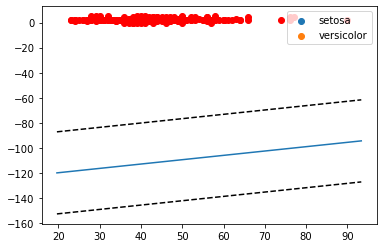

In [25]:
#plot 

plt.scatter(X_train[y_train=="setosa"].iloc[:,0],X_train[y_train=="setosa"].iloc[:,1],label="setosa")
plt.scatter(X_train[y_train=="versicolor"].iloc[:,0],X_train[y_train=="versicolor"].iloc[:,1],label="versicolor")
plt.scatter(vec[:,0],vec[:,1],color="red")
ax = plt.gca()
xlim = ax.get_xlim()
w = linear_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - linear_model.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (linear_model.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (linear_model.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.legend(loc="best")

In [26]:
train_pred_lin=linear_model.predict(X_train)
test_pred_lin=linear_model.predict(X_test)
train_lin_acc=np.mean(train_pred_lin==y_train)
test_lin_acc=np.mean(test_pred_lin==y_test)

In [27]:
train_lin_acc

0.818

In [28]:
test_lin_acc

0.8166666666666667

In [29]:
# poly

poly_model=SVC(kernel='poly')
poly_model.fit(X_train,y_train)

SVC(kernel='poly')

In [30]:
metrics.accuracy_score(y_test,poly_model.predict(X_test))

0.8033333333333333

In [33]:
train_pred_poly=poly_model.predict(X_train)
test_pred_poly=poly_model.predict(X_test)
train_poly_acc=np.mean(train_pred_poly==y_train)
test_poly_acc=np.mean(test_pred_poly==y_test)

In [35]:
train_poly_acc

0.812

In [36]:
test_poly_acc

0.8033333333333333

In [38]:
#rbf

rbf_model=SVC(kernel='rbf',gamma=1)
rbf_model.fit(X_train,y_train)

SVC(gamma=1)

In [39]:
metrics.accuracy_score(y_test,rbf_model.predict(X_test))

0.7566666666666667

In [41]:
rbf_vec=model.support_vectors_
rbf_vec

array([[39.,  5.,  9., ...,  0., 40., 37.],
       [50.,  4.,  9., ...,  0., 13., 37.],
       [37.,  2., 12., ...,  0., 40., 37.],
       ...,
       [44.,  2., 15., ...,  0., 58., 37.],
       [42.,  2.,  9., ...,  0., 40., 37.],
       [41.,  2.,  7., ...,  0., 50., 37.]])

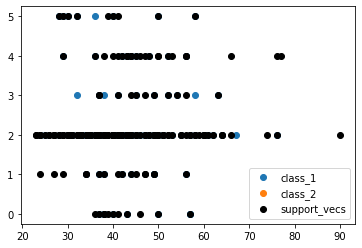

In [42]:
rbf_vec=rbf_model.support_vectors_
plt.scatter(X_train[y_train==1].iloc[:,0],X_train[y_train==1].iloc[:,1],label="class_1")
plt.scatter(X_train[y_train==2].iloc[:,0],X_train[y_train==2].iloc[:,1],label="class_2")
plt.scatter(vec[:,0],vec[:,1],color="black",label="support_vecs")
plt.legend(loc="best")

In [43]:
#SVR

from sklearn.svm import SVR

In [44]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

In [45]:
y[::5] += 3 * (0.5 - np.random.rand(8))

In [47]:
rbf = SVR(kernel='rbf', C=100,  epsilon=.1)
lin = SVR(kernel='linear', C=100)
poly = SVR(kernel='poly', C=100, degree=3, epsilon=.1,
               coef0=1)

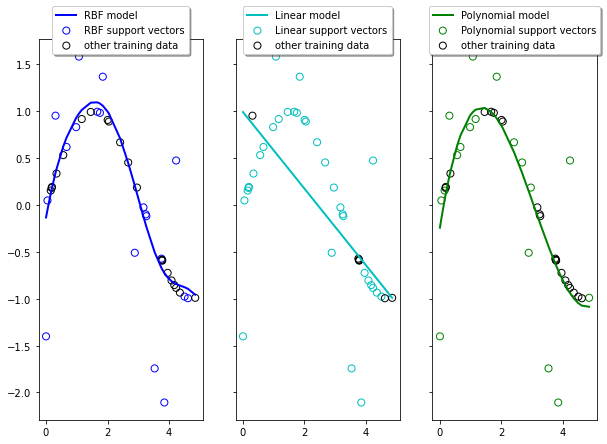

In [48]:
lw = 2

svrs = [rbf, lin, poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['b', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 7), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
